In [1]:
%run init_notebookspace.py

In [2]:
!pip install yfinance

In [3]:
!pip install pandas_datareader

In [4]:
!pip install yahoo_fin

In [5]:
import pandas as pd
import numpy as np

import yfinance as yf
import pandas_datareader as pdread
from pandas_datareader import fred

import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from yahoo_fin import stock_info as ysi

from itertools import chain

In [6]:
from src.utils import apply_datetime_format

In [7]:
# get sp500 composits & market cap
sp500_tickers = ysi.tickers_sp500()
df = pd.DataFrame(index=sp500_tickers, 
                  columns=['market_cap'], 
                  data=[pdread.get_quote_yahoo(item)['marketCap'].values[0] for item in sp500_tickers])
sp500_largest = df.sort_values('market_cap', ascending=False).index[:5].values
sp500_ticker = ['^GSPC']

In [8]:
start = '2020-01-01'
end = '2022-12-31'

In [9]:
df_prices = pd.DataFrame()
df_prices.index = pd.date_range(start, periods=(apply_datetime_format(end, '%Y-%m-%d') - apply_datetime_format(start, '%Y-%m-%d')).days)

for item in [*chain(sp500_largest, sp500_ticker)]:
    data = yf.download(item, start, end)
    data.columns = list([f'{item}_{x}' for x in data.columns])
    df_prices = df_prices.join(data)
    
# get closing price
df_c = df_prices[[item for item in df_prices.columns if 'Adj Close' in item]].copy()
df_c.columns = [item[:-10] for item in df_c.columns]
df_c.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
# get log returns
df_rets = np.log(df_c / df_c.shift(1)).dropna()
df_rets.sort_index(inplace=True)
df_rets.asfreq = "D"

df_rets['^GSPC_lead'] = df_rets['^GSPC'].shift(1)

df_rets.dropna(inplace=True)
df_rets.index.asfreq = 'd'


In [11]:
# save data to file
df_rets.to_csv(os.path.join(DATA_DIR, 'returns.csv'))

In [12]:
# load data from file
df_rets = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'))

In [ ]:
# Error Attempts 
# original : 
# mydata = pd.read_csv('mydataset.csv', names = ['value'], header = 0)  
# mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'))  
    # But this is wrong because I need the 'value' argument 
#mydata = pd.read_csv('returns.csv', names = ['value'], header = 0)  
    # But this is wrong because it 'cannot find the file'
#mydata = pd.read_csv('returns.csv', names = ['0,AAPL,MSFT,GOOG,GOOGL,AMZN,^GSPC,^GSPC_lead'], header = 0)  
#mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['0,AAPL,MSFT,GOOG,GOOGL,AMZN,^GSPC,^GSPC_lead'], header = 0)  

# what works: mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  


In [ ]:
# Checking for stationarity via ADF test below
# dickey-fuller attempt 1 
from statsmodels.tsa.stattools import adfuller  
from numpy import log  
import pandas as pd  
  
mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

res = adfuller(mydata.value.dropna())  
                     
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

In [ ]:
# determining the ADF for the 'd' value of ARIMA 


In [ ]:
# Next looking at autocorrelation 
import numpy as np, pandas as pd  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt 
plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' : 120})
plt.show()

In [ ]:
# Importing data  
df = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

In [ ]:
#print (df)

In [ ]:
# Attempt to correct error 1 
#ndarray = df.to_numpy()
# print(ndarray)

In [ ]:
# The Genuine Series 
fig, axes = plt.subplots(3, 2, sharex = True)  
axes[0, 0].plot(df.value); axes[0, 0].set_title('The Genuine Series')  
plot_acf(df.value, ax = axes[0, 1])

In [ ]:
# Order of Differencing: First  
axes[1, 0].plot(mydata.value.diff()); axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(df.value.diff().dropna(), ax = axes[1, 1])  

In [ ]:
# Order of Differencing: Second  
axes[2, 0].plot(df.value.diff().diff()); axes[2, 0].set_title('Order of Differencing: Second')  
plot_acf(df.value.diff().diff().dropna(), ax = axes[2, 1])  
plt.show()  


In [ ]:
# Determine the differencing above. Weak/ strong stationarity? 
# Next, looking at how to make the data stationary via 3 tests. 

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima.utils import ndiffs  
import pandas as pd
import os

In [ ]:
df = pd.read_csv(pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)
X = df.value  

In [ ]:
# Augmented Dickey Fuller Test  
adftest = ndiffs(df, test = 'adf')  

In [ ]:
# KPSS Test  
kpsstest = ndiffs(df, test = 'kpss')  

In [ ]:
# PP Test  
pptest = ndiffs(df, test = 'pp')  

In [ ]:
print("ADF Test =", adftest)  
print("KPSS Test =", kpsstest)  
print("PP Test =", pptest) 

In [13]:
#Next finding the 'p' term for AR via a partial auocorrelation graph

In [14]:
import numpy as np, pandas as pd  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt  

In [15]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})  

In [16]:
import os

In [17]:
# importing data 
df = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

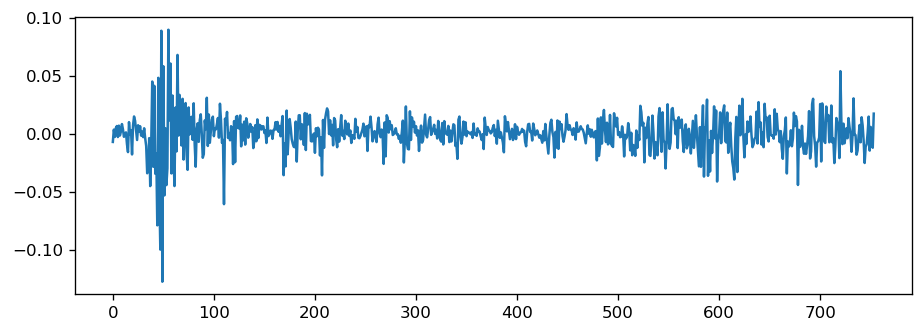

In [18]:
 plt.plot(df.to_numpy(), label='Close')

In [19]:
ndarray = np.asarray(df)
print(ndarray)

[[-7.08490936e-03]
 [ 3.52714519e-03]
 [-2.80717508e-03]
 [ 4.89047349e-03]
 [ 6.63321412e-03]
 [-2.85926249e-03]
 [ 6.95199405e-03]
 [-1.51568084e-03]
 [ 1.86845024e-03]
 [ 8.33174742e-03]
 [ 3.85472325e-03]
 [-2.65550037e-03]
 [ 2.89034297e-04]
 [ 1.14032619e-03]
 [-9.08328943e-03]
 [-1.58557524e-02]
 [ 1.00033835e-02]
 [-8.67250144e-04]
 [ 3.12945693e-03]
 [-1.78644436e-02]
 [ 7.22842576e-03]
 [ 1.48693159e-02]
 [ 1.11877787e-02]
 [ 3.32015506e-03]
 [-5.41549101e-03]
 [ 7.29969012e-03]
 [ 1.68704869e-03]
 [ 6.44185311e-03]
 [-1.63177636e-03]
 [ 1.84183610e-03]
 [-2.92421399e-03]
 [ 4.69474828e-03]
 [-3.82281743e-03]
 [-1.05738092e-02]
 [-3.40880794e-02]
 [-3.07479044e-02]
 [-3.78569732e-03]
 [-4.51681364e-02]
 [-8.27246311e-03]
 [ 4.50108688e-02]
 [-2.85104849e-02]
 [ 4.13363494e-02]
 [-3.45107824e-02]
 [-1.72009437e-02]
 [-7.90104129e-02]
 [ 4.82150524e-02]
 [-5.01028928e-02]
 [-9.99448524e-02]
 [ 8.88084069e-02]
 [-1.27652197e-01]
 [ 5.82263126e-02]
 [-5.32222723e-02]
 [ 4.6967609

/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


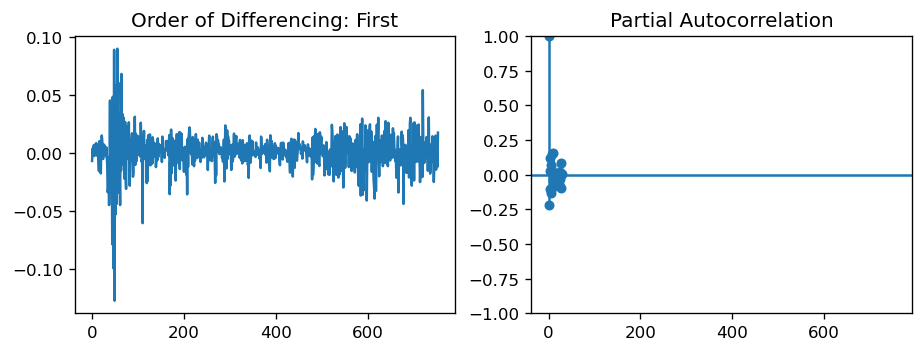

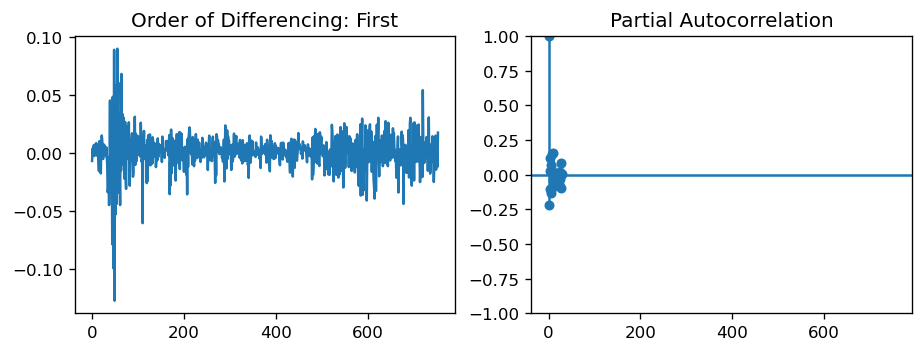

In [20]:
fig, axes = plt.subplots(1, 2, sharex = True)
axes[0].plot(ndarray); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0,5))  
plot_pacf(ndarray, ax = axes[1]) 

In [21]:
# Look a the blue region to determine if it is useful or not
# In the PAC graph, there should be a light blue box showing the significance-- need to fix this 
# Otherwise, for PAC I would say there is an order of 1 or 2 at the moment

In [ ]:
# Results into a matrix

In [22]:
#Next, finding the 'q' - Moving Averages
import numpy as np, pandas as pd  
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  
import matplotlib.pyplot as plt  
  
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  

In [25]:
# Importing data  
mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

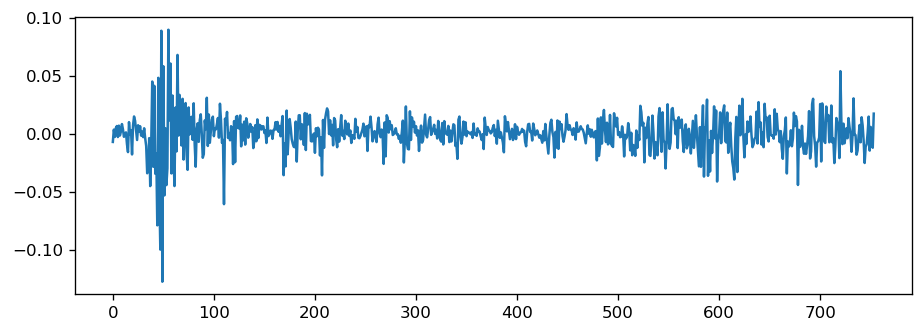

In [26]:
 plt.plot(df.to_numpy(), label='Close')

In [29]:
mydata = np.asarray(df)
print(mydata)

[[-7.08490936e-03]
 [ 3.52714519e-03]
 [-2.80717508e-03]
 [ 4.89047349e-03]
 [ 6.63321412e-03]
 [-2.85926249e-03]
 [ 6.95199405e-03]
 [-1.51568084e-03]
 [ 1.86845024e-03]
 [ 8.33174742e-03]
 [ 3.85472325e-03]
 [-2.65550037e-03]
 [ 2.89034297e-04]
 [ 1.14032619e-03]
 [-9.08328943e-03]
 [-1.58557524e-02]
 [ 1.00033835e-02]
 [-8.67250144e-04]
 [ 3.12945693e-03]
 [-1.78644436e-02]
 [ 7.22842576e-03]
 [ 1.48693159e-02]
 [ 1.11877787e-02]
 [ 3.32015506e-03]
 [-5.41549101e-03]
 [ 7.29969012e-03]
 [ 1.68704869e-03]
 [ 6.44185311e-03]
 [-1.63177636e-03]
 [ 1.84183610e-03]
 [-2.92421399e-03]
 [ 4.69474828e-03]
 [-3.82281743e-03]
 [-1.05738092e-02]
 [-3.40880794e-02]
 [-3.07479044e-02]
 [-3.78569732e-03]
 [-4.51681364e-02]
 [-8.27246311e-03]
 [ 4.50108688e-02]
 [-2.85104849e-02]
 [ 4.13363494e-02]
 [-3.45107824e-02]
 [-1.72009437e-02]
 [-7.90104129e-02]
 [ 4.82150524e-02]
 [-5.01028928e-02]
 [-9.99448524e-02]
 [ 8.88084069e-02]
 [-1.27652197e-01]
 [ 5.82263126e-02]
 [-5.32222723e-02]
 [ 4.6967609

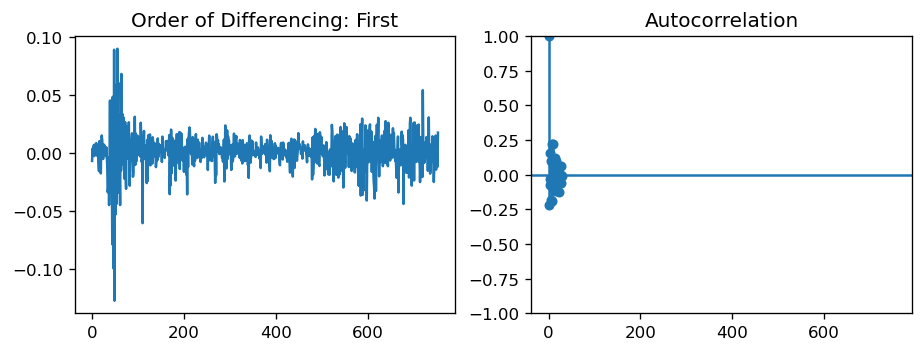

In [34]:
fig, axes = plt.subplots(1, 2, sharex = True)  
axes[0].plot(mydata); axes[0].set_title('Order of Differencing: First')  
axes[1].set(ylim = (0, 1.2))  
plot_acf(mydata, ax = axes[1])  
plt.show() 

In [35]:
# Looking at the autocorrelation graph, we can determine the number needed for q 
# Again, missing that blue box for significance 
#3 Otherwise, I would say that we have an order of 1 here 

In [39]:
# Now building the ARIMA model 

import numpy as np, pandas as pd  
import statsmodels.api as sm

In [40]:
# importing data  
mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

In [42]:
# Creating ARIMA model  
# change the () to whatever numbers we get from the results for p,d,q above 
mymodel = sm.tsa.arima.ARIMA(mydata.value, order = (1, 1, 2))  
modelfit = mymodel.fit()  

print(modelfit.summary())  

/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  754
Model:                 ARIMA(1, 1, 2)   Log Likelihood                2039.386
Date:                Tue, 21 Mar 2023   AIC                          -4070.772
Time:                        16:45:33   BIC                          -4052.276
Sample:                             0   HQIC                         -4063.647
                                - 754                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9415      0.025    -37.840      0.000      -0.990      -0.893
ma.L1         -0.0264      0.545     -0.048      0.961      -1.095       1.042
ma.L2         -0.9735      0.523     -1.861      0.0

In [53]:
# Creating ARIMA model 2
# change the () to whatever numbers we get from the results for p,d,q above 
mymodel = sm.tsa.arima.ARIMA(mydata.value, order = (1, 0, 1))  
modelfit = mymodel.fit()  

print(modelfit.summary())

/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  754
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2062.924
Date:                Tue, 21 Mar 2023   AIC                          -4117.847
Time:                        16:49:33   BIC                          -4099.346
Sample:                             0   HQIC                         -4110.720
                                - 754                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.405      0.686      -0.001       0.001
ar.L1         -0.5698      0.058     -9.858      0.000      -0.683      -0.457
ma.L1          0.3767      0.065      5.814      0.0

In [43]:
# These are the results. We can alter the output by changing the AIC/ BIC if we have a close call. 

# Now we plot the residuals to ensure that there is no constant mean or varaince to worry about 

In [54]:
import numpy as np, pandas as pd  
import statsmodels.api as sm
import matplotlib.pyplot as plt  

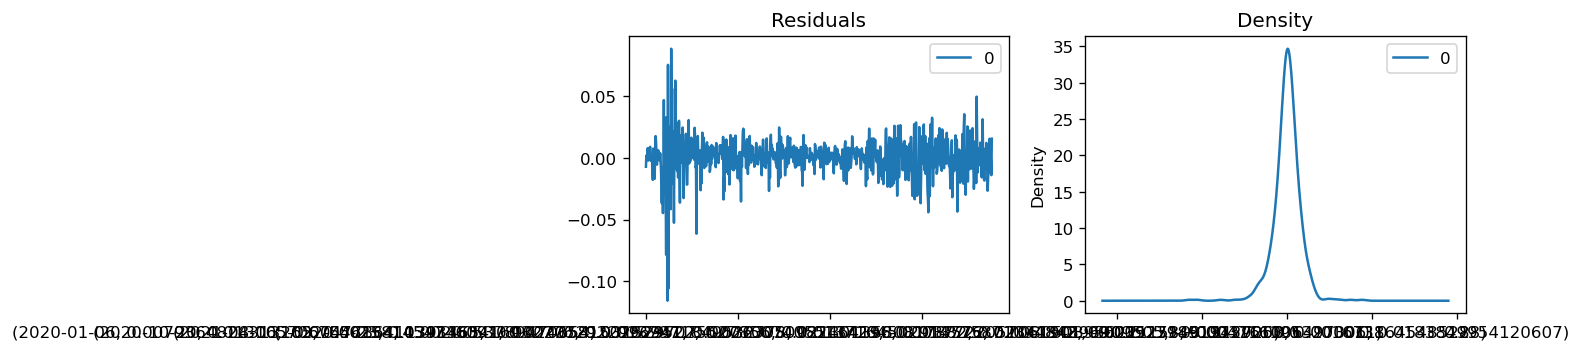

In [55]:
# Plotting Residual Errors
# Work on the scale of these graphs
myresiduals = pd.DataFrame(modelfit.resid)  
fig, ax = plt.subplots(1,2)  
myresiduals.plot(title = "Residuals", ax = ax[0])  
myresiduals.plot(kind = 'kde', title = 'Density', ax = ax[1])  
plt.show()  

In [56]:
# finally, graphing our predicted versus actual values for trend analysis 

In [63]:
import numpy as np, pandas as pd  
from statsmodels.tsa.arima_model import ARIMA  
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

In [64]:
plt.rcParams.update({'figure.figsize' : (9,3), 'figure.dpi' : 120})  


In [74]:
# importing data  
mydata = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  

In [73]:
# The best fitting aRIMA model from before
# Change the () to whatever numbers we get from the results for p,d,q above 
mymodel = sm.tsa.arima.ARIMA(mydata.value, order = (1, 0, 1))  
modelfit = mymodel.fit()  

print(modelfit.summary()) 

/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tsagedouglas/opt/miniconda3/envs/econ/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  754
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2062.924
Date:                Tue, 21 Mar 2023   AIC                          -4117.847
Time:                        17:02:15   BIC                          -4099.346
Sample:                             0   HQIC                         -4110.720
                                - 754                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.405      0.686      -0.001       0.001
ar.L1         -0.5698      0.058     -9.858      0.000      -0.683      -0.457
ma.L1          0.3767      0.065      5.814      0.0

In [84]:
# Actual vs Fitted  

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

df = pd.read_csv(os.path.join(DATA_DIR, 'returns.csv'), names = ['value'], header = 0)  
dta.index = pd.date_range(start = '2020-01-01', end = '2022-01-01', freq='A')
res = ARIMA(dta, order=(1,0,1)).fit()
fig, ax = plt.subplots()
ax = dta.loc['2020-01-01':].plot(ax=ax)
plot_predict(res, '2020-01-01', '2022-01-01', ax=ax)
plt.show()

ValueError: Length mismatch: Expected axis has 754 elements, new values have 2 elements

In [ ]:
# Working on making these into a matrix 

In [85]:
test['AAPL'].values.reshape(len(test),1)

NameError: name 'test' is not defined

In [87]:
[[(x, y) for x in range (1,5)] for y in range(1, 5)]

[[(1, 1), (2, 1), (3, 1), (4, 1)],
 [(1, 2), (2, 2), (3, 2), (4, 2)],
 [(1, 3), (2, 3), (3, 3), (4, 3)],
 [(1, 4), (2, 4), (3, 4), (4, 4)]]

In [88]:
mod = ARIMA(train['^GSPC'].values, order=(1,0,1))
res = mod.fit()
res.summary()

NameError: name 'train' is not defined